# **COMP_Pract_06(Fri 4pm)_Group B**

#Group Members

>Sadia Afreen Anannya |   **44483228**
>Md Safayatul Islam |   **44324049**
>Ahsan Adil Nibir |   **44397836**
>Anika Monjerin Otoshi |  **44522851**

# Summary 
Taxation is one of the most important sources that a government gets paid. Taxation is very important in order to make the economy and businesses grow as it helps to build bridges and roads, provide healthcare services for the citizens of the country and in order to get more and more foureing investments; education relies highly on these internal investment. Thus, we decided to work on this data. 
The goal of our project is to Analyze these data and provide better suggestions for the officials to understand what measures are required to maximize the taxation throughout the country.


# Goals
Our goals are to visualise how numbers of individuals with different interests in rental property are affected around different aspects, e.g. net range position, taxable income range, state/territory or age range etc.

Our goals are to visualise how numbers of individuals with different interests in rental property are affected around different aspects, e.g. net range position, taxable income range, state/territory or age range etc.

- A **regression** and **RFE analysis** and **correlation matrices** of variables such as Taxable income range, income year, age range, state/ territory, number of property interests etc. The distribution of these variables will be observed and the best factors will be selected for further analysis.

- **Trend or Time-Series analysis (ARIMA)** to determine the trend of different factors in a series of particular time period.

- **Heat maps** across the various territories throughout Australia from the dataset to determine the hottest areas (areas with most individuals and magnitude of their interest in rental properties) around the years.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt
from matplotlib.pyplot import imread
%matplotlib inline

In [2]:
#table_27d = df_d
dfd = pd.read_excel('table_27d.xlsx',skiprows=2,inplace=True)

In [3]:
dfd.head()

,Income year2,Number of property interests1,Age range4,Number of individuals
0,2000,1 interest,a. Less than 30,96269
1,2000,1 interest,b. 30 - 39,224650
2,2000,1 interest,c. 40 - 49,246659
3,2000,1 interest,d. 50 - 59,198556
4,2000,1 interest,e. 60 or more,122964


In [4]:
#deleting unwanted string from the column "Number of property interests"
dfd['Number of property interests1'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [5]:
dfd.head()

,Income year2,Number of property interests1,Age range4,Number of individuals
0,2000,1,a. Less than 30,96269
1,2000,1,b. 30 - 39,224650
2,2000,1,c. 40 - 49,246659
3,2000,1,d. 50 - 59,198556
4,2000,1,e. 60 or more,122964


In [6]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
Income year2                     560 non-null int64
Number of property interests1    560 non-null object
Age range4                       560 non-null object
Number of individuals            560 non-null int64
dtypes: int64(2), object(2)
memory usage: 17.6+ KB


In [7]:
dfd['Number of property interests1'] = dfd['Number of property interests1'].astype(int) # converting string to integer 

In [8]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
Income year2                     560 non-null int64
Number of property interests1    560 non-null int32
Age range4                       560 non-null object
Number of individuals            560 non-null int64
dtypes: int32(1), int64(2), object(1)
memory usage: 15.4+ KB


In [9]:
dfd.describe()

,Income year2,Number of property interests1,Number of individuals
count,560.000000,560.000000,560.000000
mean,2008.525000,3.419643,53018.746429
std,5.200394,1.731733,92976.147157
min,2000.000000,1.000000,1.000000
25%,2004.000000,2.000000,2323.750000
50%,2009.000000,3.000000,8923.000000
75%,2013.000000,5.000000,57652.250000
max,2017.000000,6.000000,381910.000000


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [10]:
sns.set_palette("Accent")# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r
sns.set_style('darkgrid') #other values: white, dark, whitegrid, darkgrid, ticks
sns.set(rc={'figure.figsize':(22,12)})

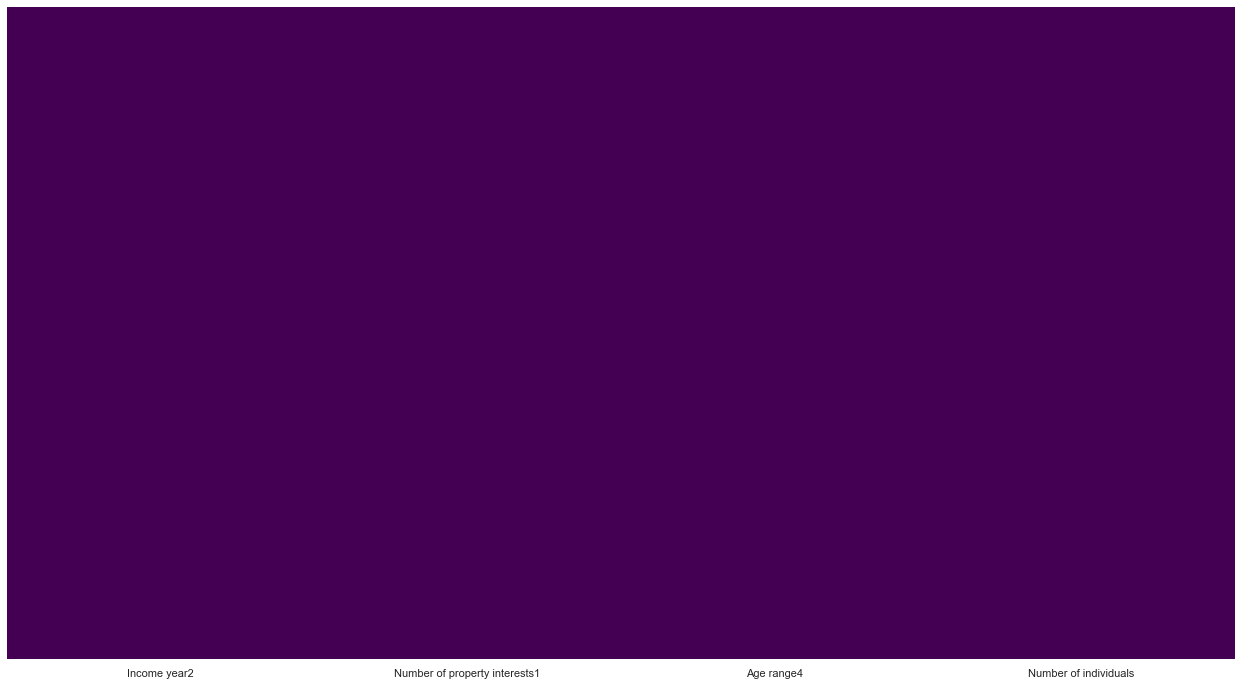

In [11]:
sns.heatmap(dfd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No data is missing

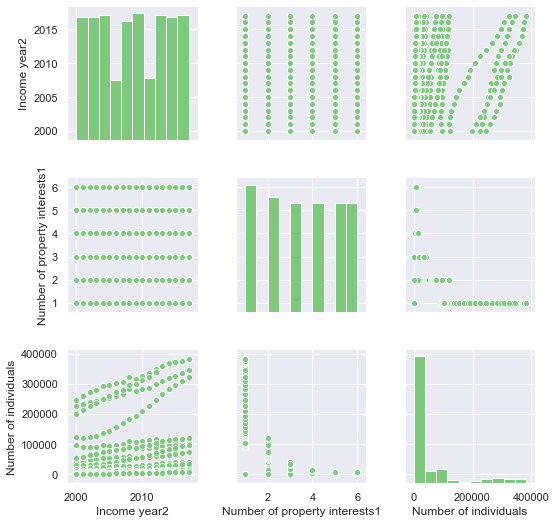

In [13]:
sns.set_palette("Accent")
sns.set_style('darkgrid')
sns.pairplot(dfd)

### Correlation HeatMap of the data

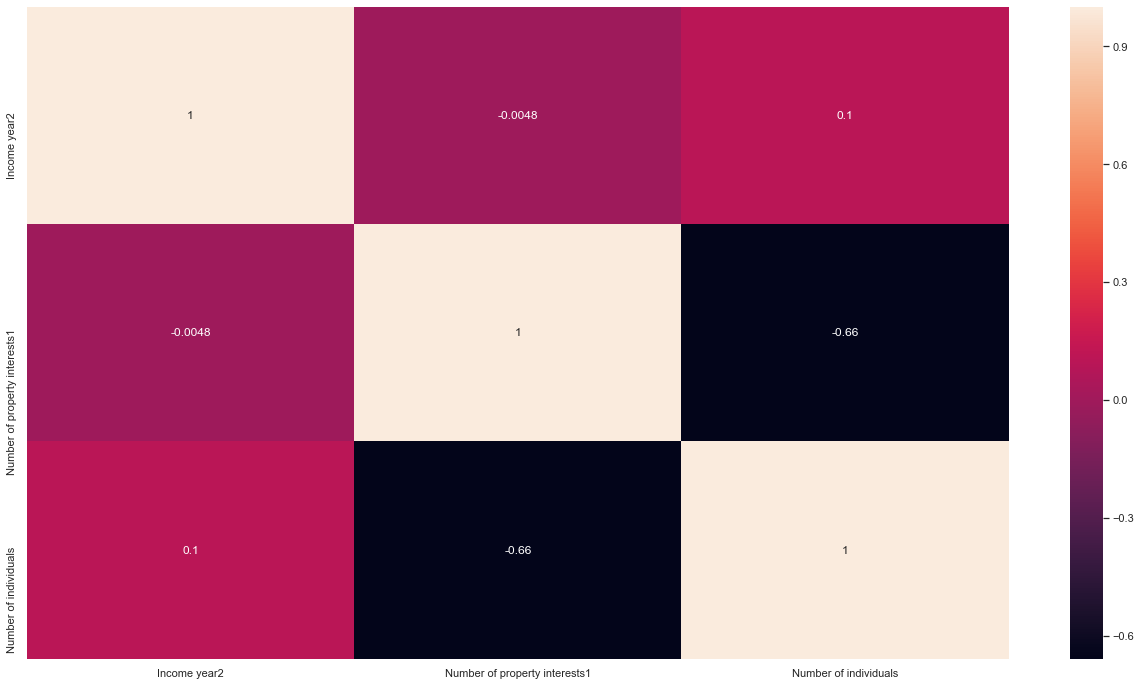

In [14]:
sns.heatmap(dfd.corr(), annot = True)
sns.set(rc={'figure.figsize':(22,12)})


In [15]:
dfd.columns

Index(['Income year2', 'Number of property interests1', 'Age range4',
       'Number of individuals'],
      dtype='object')

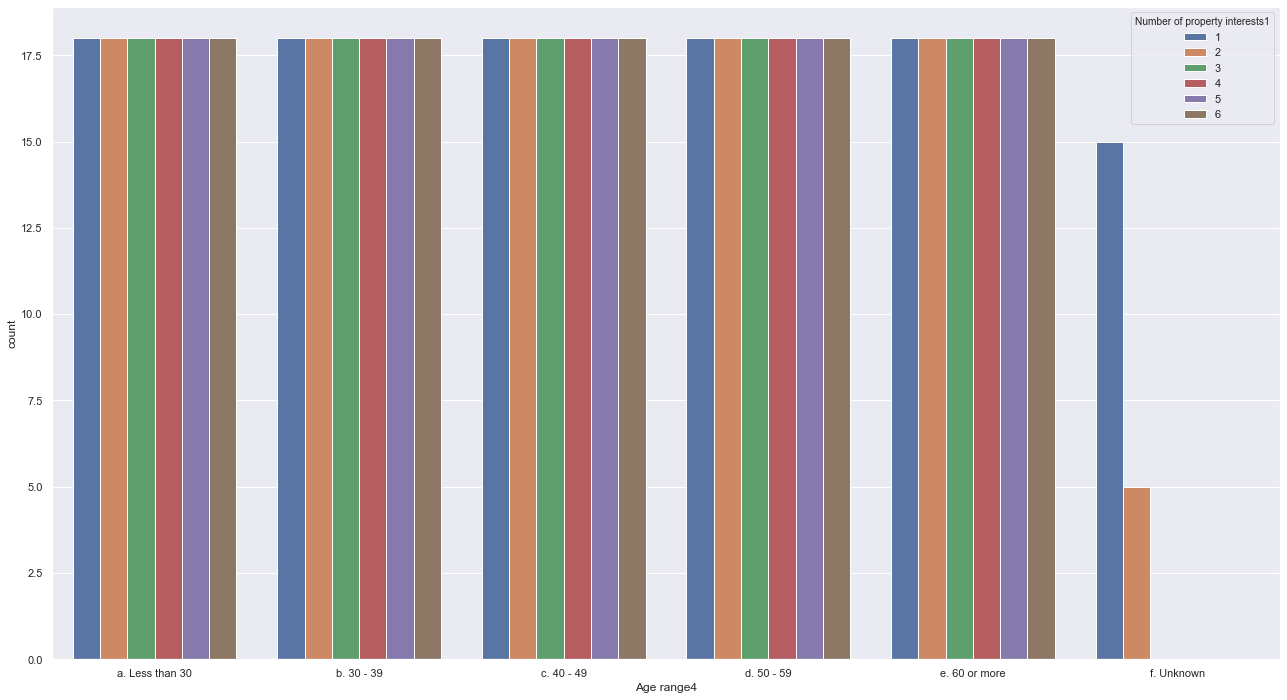

In [17]:
sns.countplot(x='Age range4',hue='Number of property interests1',data=dfd)
sns.set(rc={'figure.figsize':(36,16)})

In [65]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

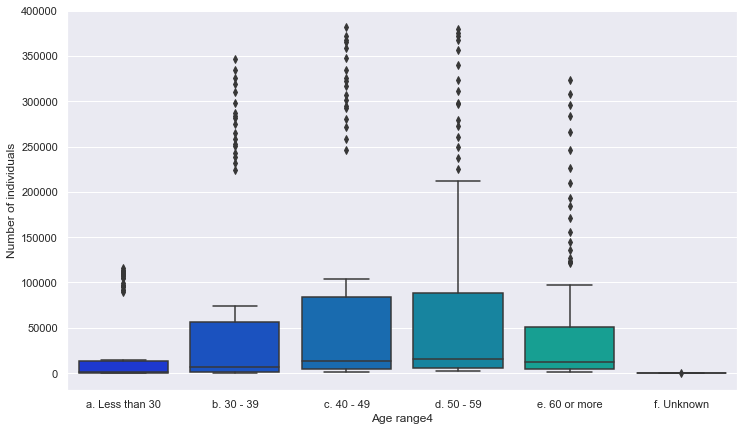

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age range4',y='Number of individuals',data=dfd,palette='winter')
sns.set(rc={'figure.figsize':(22,14)})

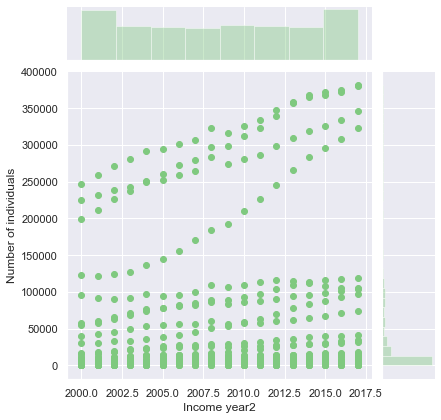

In [19]:
sns.set_palette("Accent")
sns.set_style('darkgrid')
sns.jointplot(data=dfd, x='Income year2', y='Number of individuals')

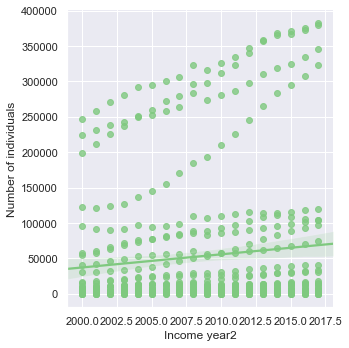

In [20]:
sns.lmplot(data=dfd,x='Income year2',y='Number of individuals')

In [21]:
dfd.head(20)

,Income year2,Number of property interests1,Age range4,Number of individuals
0,2000,1,a. Less than 30,96269
1,2000,1,b. 30 - 39,224650
2,2000,1,c. 40 - 49,246659
3,2000,1,d. 50 - 59,198556
4,2000,1,e. 60 or more,122964
5,2000,1,f. Unknown,2
6,2000,2,a. Less than 30,10834
7,2000,2,b. 30 - 39,40476
8,2000,2,c. 40 - 49,57624
9,2000,2,d. 50 - 59,54512


## Filtering by Taxable Income Range

In [23]:
#filtering by age range = 30-39
dfd_ar30  = dfd.loc[dfd['Age range4'] == 'b. 30 - 39']

In [24]:
dfd_ar30

,Income year2,Number of property interests1,Age range4,Number of individuals
1,2000,1,b. 30 - 39,224650
7,2000,2,b. 30 - 39,40476
12,2000,3,b. 30 - 39,8460
17,2000,4,b. 30 - 39,2308
22,2000,5,b. 30 - 39,687
...,...,...,...,...
535,2017,2,b. 30 - 39,74235
541,2017,3,b. 30 - 39,17885
546,2017,4,b. 30 - 39,5576
551,2017,5,b. 30 - 39,1963


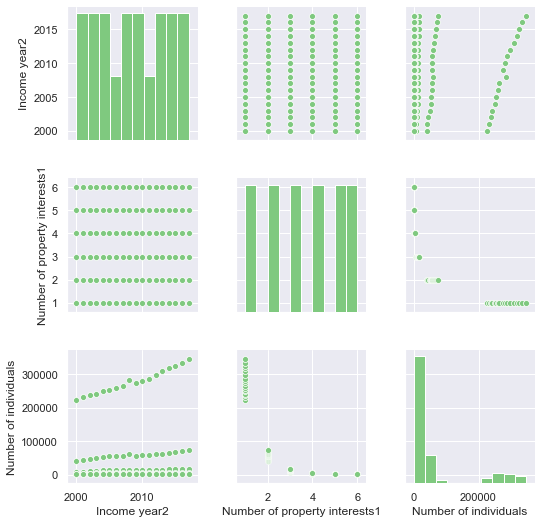

In [25]:
sns.pairplot(dfd_ar30)

In [26]:
dfd_ar30.describe()

,Income year2,Number of property interests1,Number of individuals
count,108.000000,108.000000,108.000000
mean,2008.500000,3.500000,59473.546296
std,5.212315,1.715787,101660.409919
min,2000.000000,1.000000,487.000000
25%,2004.000000,2.000000,1625.500000
50%,2008.500000,3.500000,7018.000000
75%,2013.000000,5.000000,56660.000000
max,2017.000000,6.000000,346141.000000


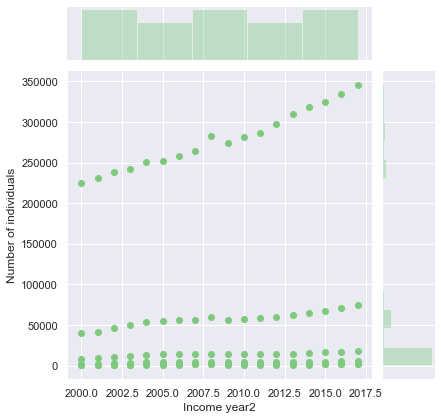

In [27]:
sns.jointplot(data=dfd_ar30, x='Income year2', y='Number of individuals')

Number of individuals did not increase over the years whose income is below 18000 dollars 

In [31]:
#filtering by Age range = 40-49
dfd_ar  = dfd.loc[dfd['Age range4'] == 'c. 40 - 49']

In [32]:
dfd_ar

,Income year2,Number of property interests1,Age range4,Number of individuals
2,2000,1,c. 40 - 49,246659
8,2000,2,c. 40 - 49,57624
13,2000,3,c. 40 - 49,15111
18,2000,4,c. 40 - 49,4712
23,2000,5,c. 40 - 49,1772
...,...,...,...,...
536,2017,2,c. 40 - 49,103712
542,2017,3,c. 40 - 49,31169
547,2017,4,c. 40 - 49,11123
552,2017,5,c. 40 - 49,4560


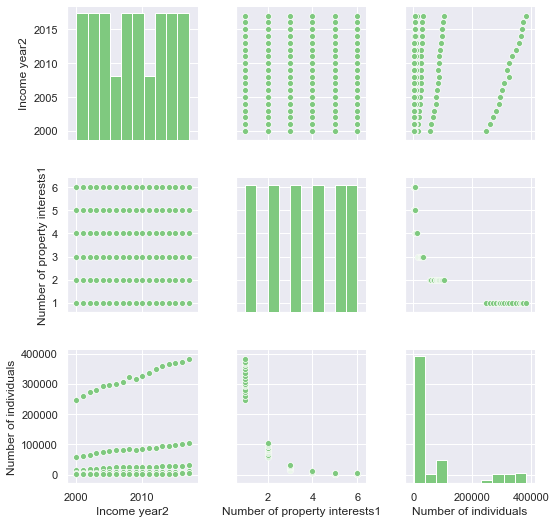

In [33]:
sns.pairplot(dfd_ar)

In [34]:
dfd_ar.describe()

,Income year2,Number of property interests1,Number of individuals
count,108.000000,108.000000,108.000000
mean,2008.500000,3.500000,73722.037037
std,5.212315,1.715787,115022.247689
min,2000.000000,1.000000,1479.000000
25%,2004.000000,2.000000,3909.250000
50%,2008.500000,3.500000,13117.000000
75%,2013.000000,5.000000,83891.250000
max,2017.000000,6.000000,381910.000000


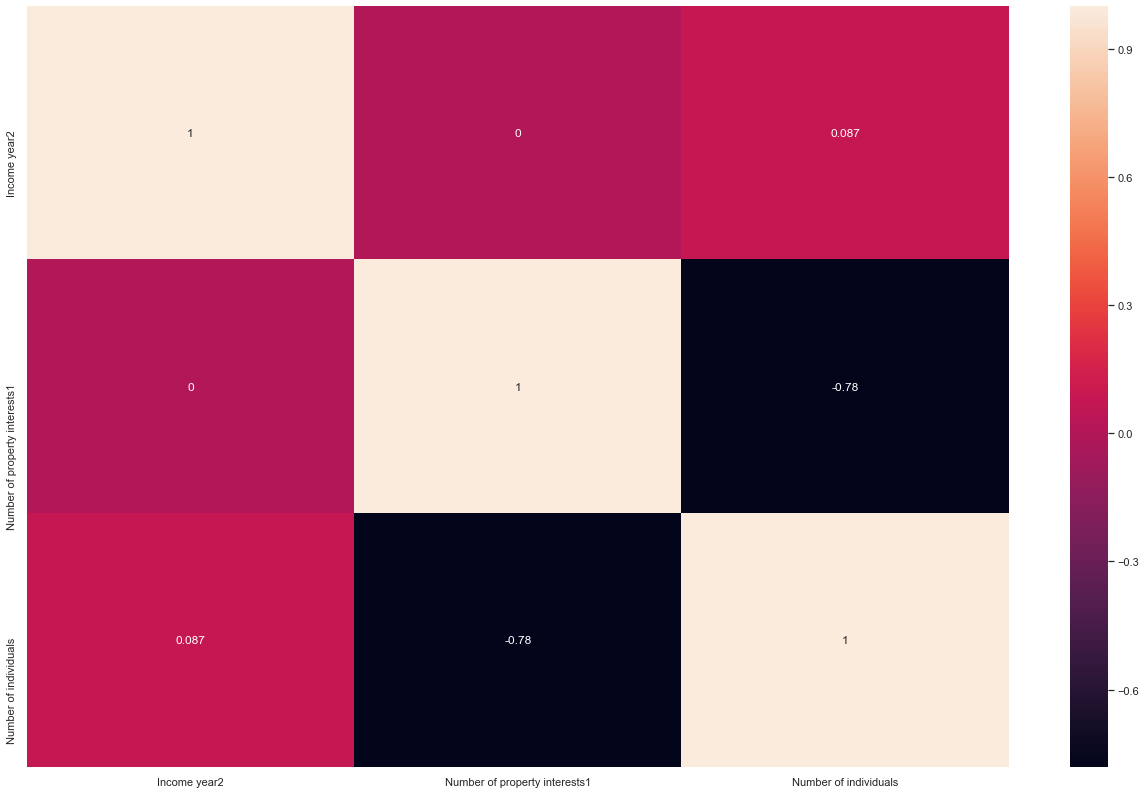

In [35]:
sns.heatmap(dfd_ar.corr(), annot = True)

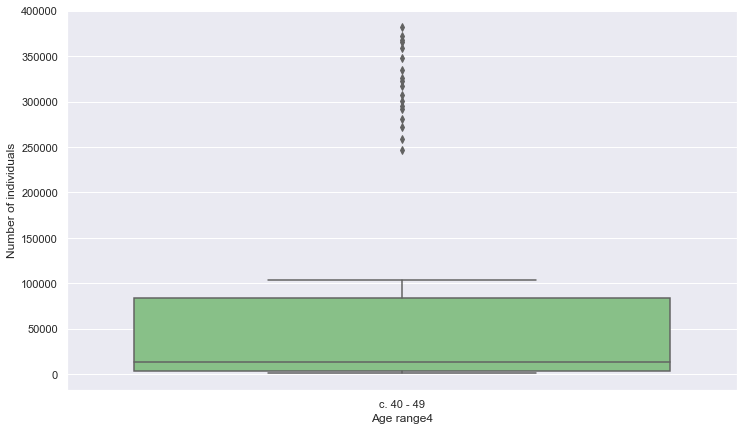

In [37]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age range4',y='Number of individuals',data=dfd_ar)

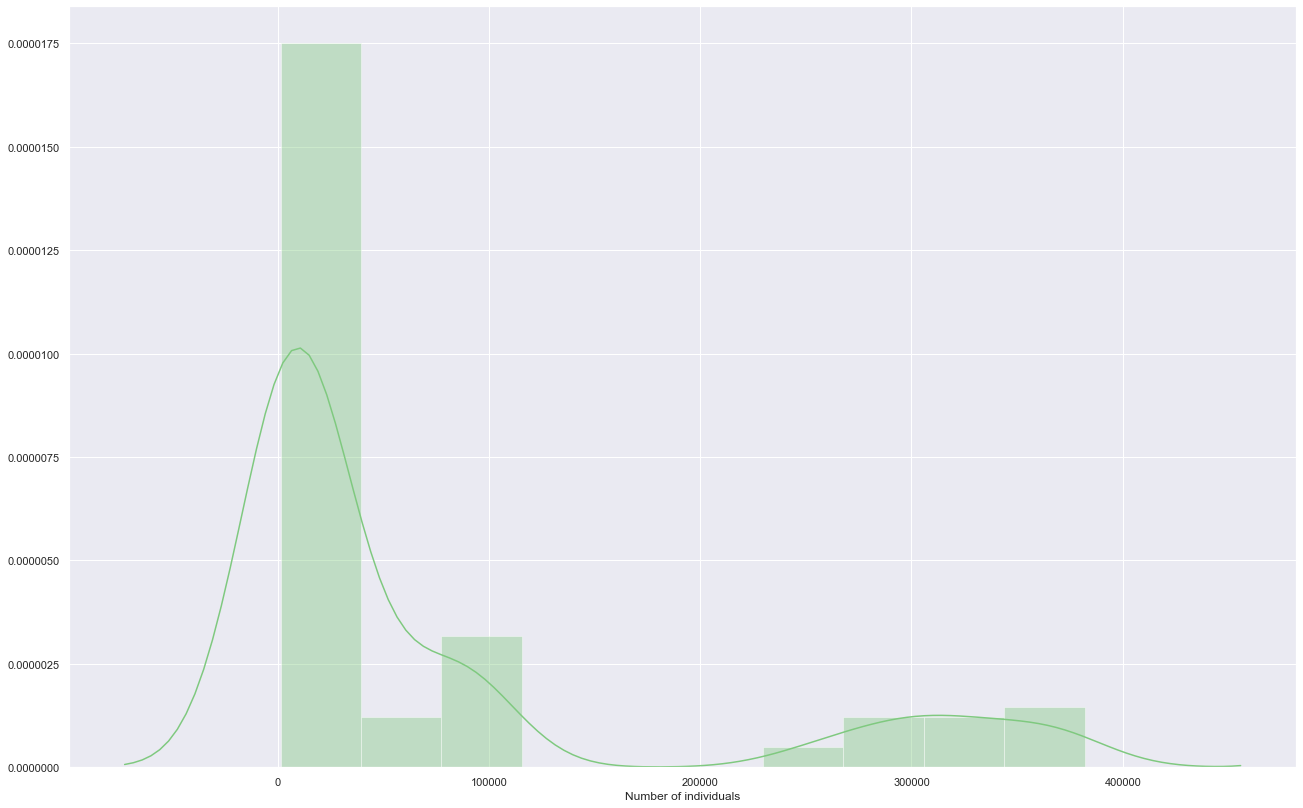

In [38]:
sns.distplot(dfd_ar['Number of individuals'], bins=10)

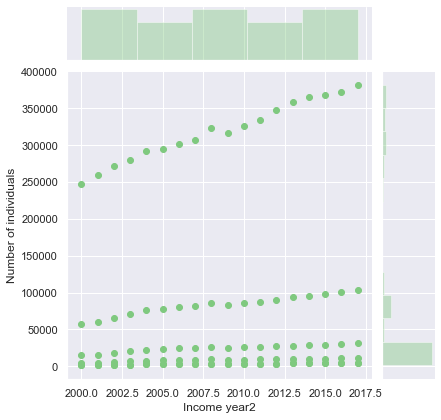

In [39]:
sns.jointplot(data=dfd_ar, x='Income year2', y='Number of individuals')

Number of individiduals increased slightly over the years 

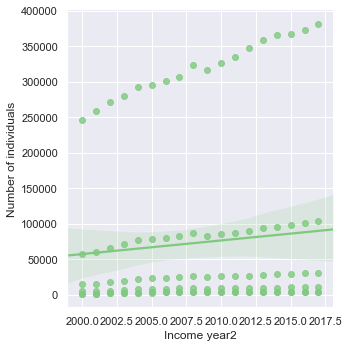

In [40]:
sns.lmplot(data=dfd_ar, x='Income year2', y='Number of individuals')

### Linear Regression (Predicting number of individuals in future)

In [41]:
X = dfd_ar[['Income year2', 'Number of property interests1']]
y = dfd_ar[['Number of individuals']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#creating and training the model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

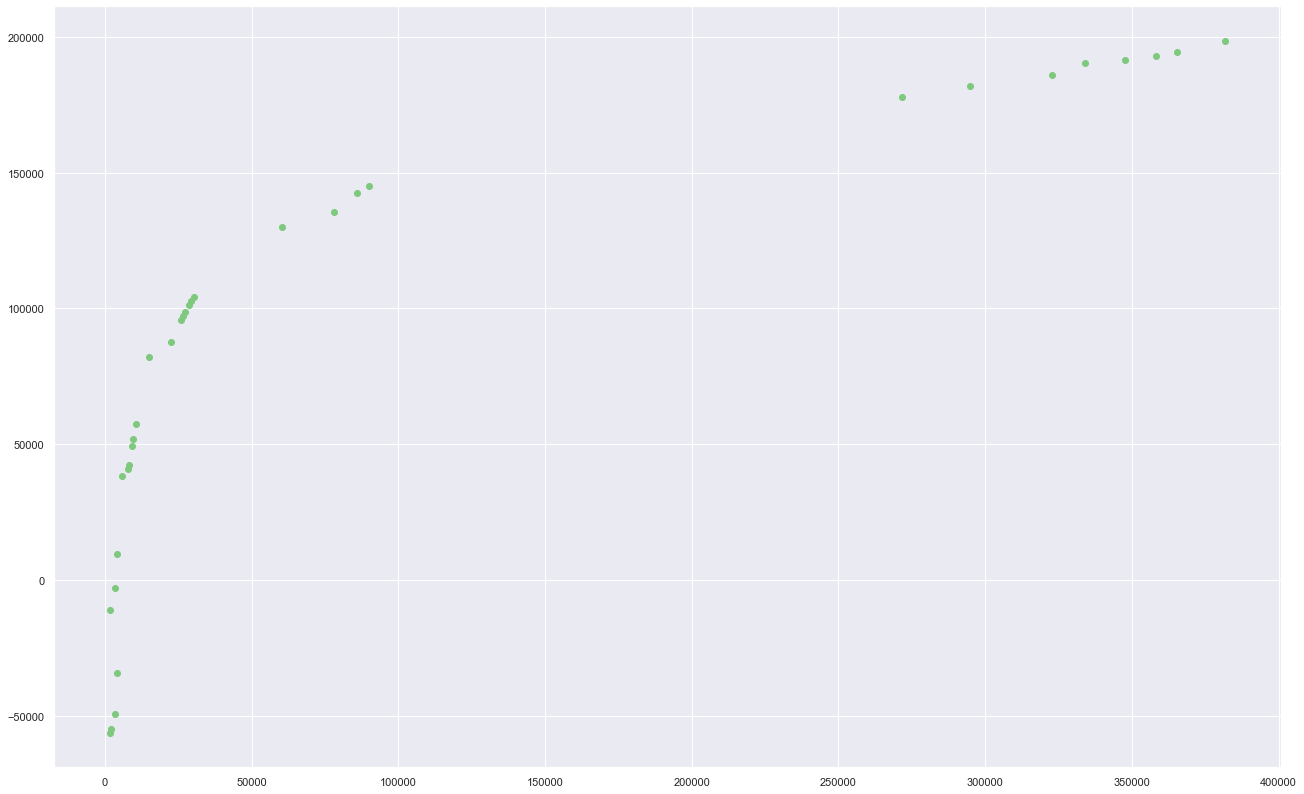

In [42]:
#prediction
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)


### Model Evaluation 

In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 73442.01115085836
MSE: 7559750265.545584
RMSE: 86946.82435572667


## Analyzing who has number of property interest = 1 and Age range is 40-49

In [46]:
#Selecting who have number of property interst = 1
dfd_ar1= dfd_ar.loc[dfd_ar['Number of property interests1'] == 1]

In [47]:
dfd_ar1.head()

,Income year2,Number of property interests1,Age range4,Number of individuals
2,2000,1,c. 40 - 49,246659
33,2001,1,c. 40 - 49,258795
64,2002,1,c. 40 - 49,271614
95,2003,1,c. 40 - 49,280326
126,2004,1,c. 40 - 49,292062


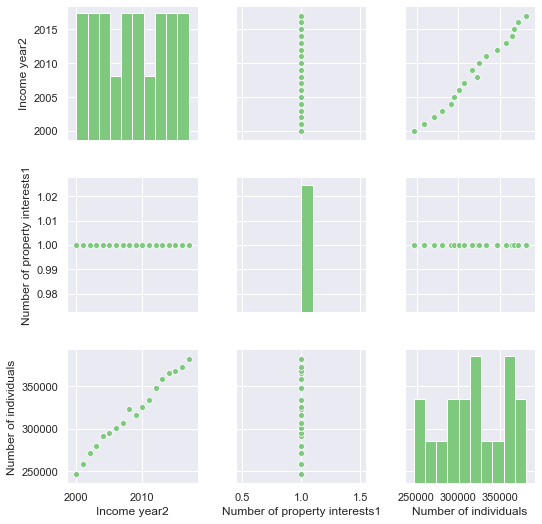

In [48]:
sns.pairplot(dfd_ar1)

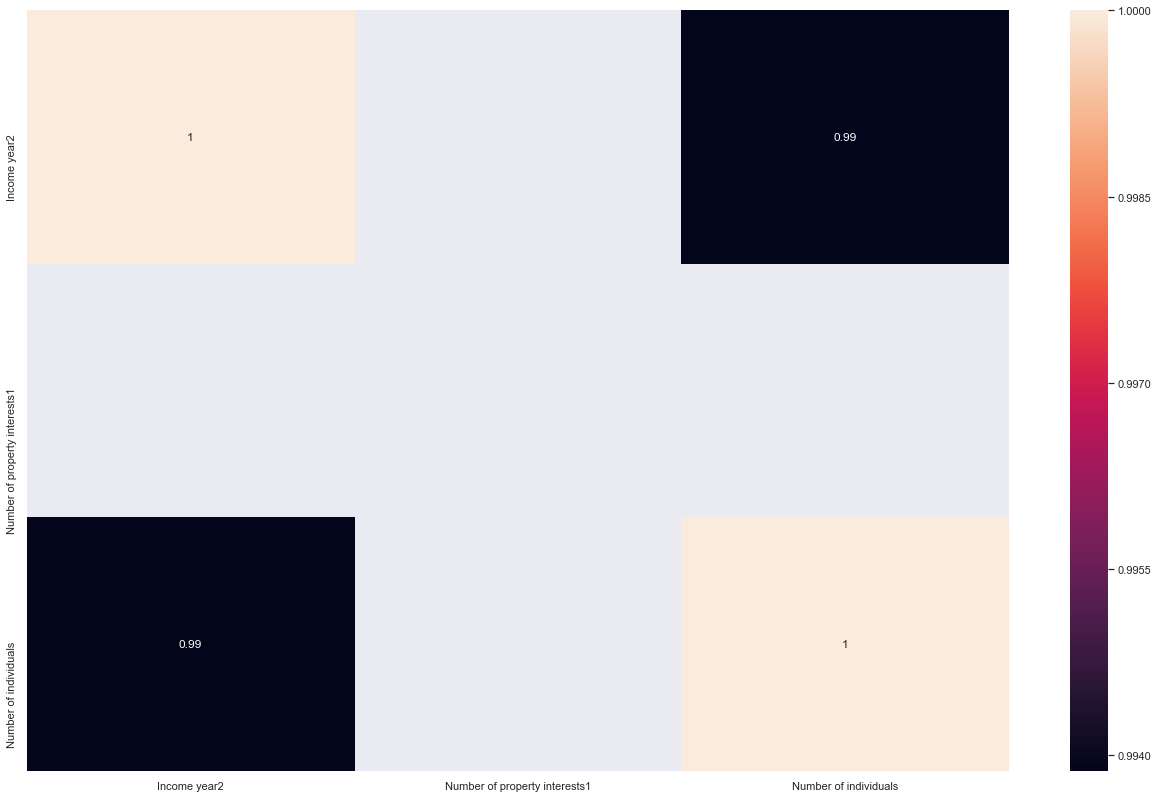

In [49]:
sns.heatmap(dfd_ar1.corr(), annot = True)

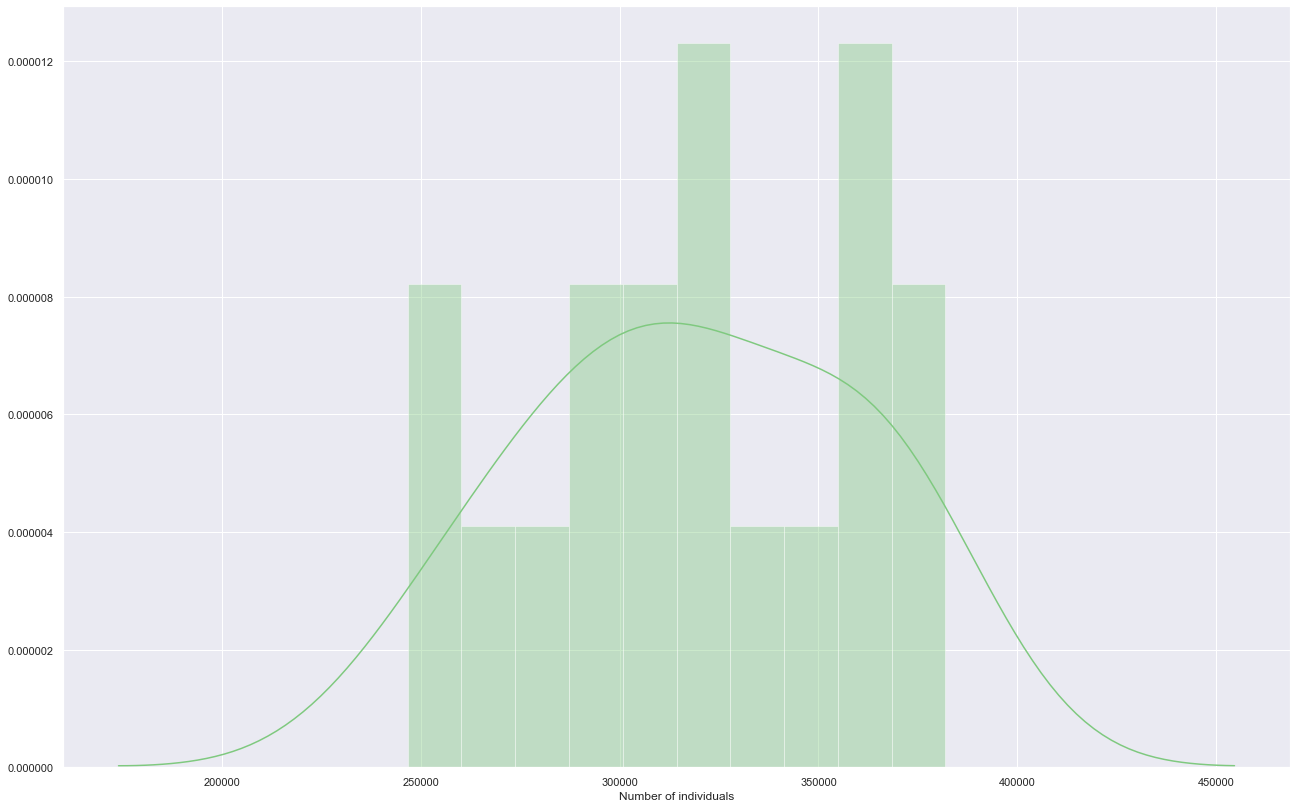

In [50]:
sns.distplot(dfd_ar1['Number of individuals'], bins=10)

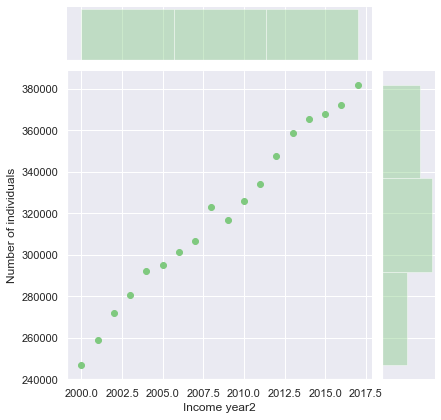

In [51]:
sns.jointplot(data=dfd_ar1, x='Income year2', y='Number of individuals')

Number of individuals increased over the years who has property interest = 1 and age range = 40-49

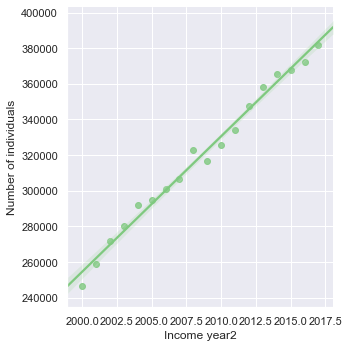

In [52]:
sns.lmplot(data=dfd_ar1, x='Income year2', y='Number of individuals')

It's clearly shown above that individuals increased over the  years who has property interest = 1 for age range 40-49

In [54]:
dfd_ar1.head()

,Income year2,Number of property interests1,Age range4,Number of individuals
2,2000,1,c. 40 - 49,246659
33,2001,1,c. 40 - 49,258795
64,2002,1,c. 40 - 49,271614
95,2003,1,c. 40 - 49,280326
126,2004,1,c. 40 - 49,292062


In [55]:
#Saving dfd_ar1 data frame as csv file to working with ARMA and ARIMA
dfd_ar1.to_csv('ar1.csv', encoding='utf-8', index=False)

## ARMA and ARIMA 

In [56]:
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

D:\Ana3\envs\tf_gpu4\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\Ana3\envs\tf_gpu4\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [57]:
#Loading the file we saved
dfd_ar1_a = pd.read_csv('ar1.csv',index_col ='Income year2',parse_dates = True)
dfd_ar1_a.index.freq = 'YS'

In [58]:
dfd_ar1_a.head()

,Number of property interests1,Age range4,Number of individuals
Income year2,,,
2000-01-01,1,c. 40 - 49,246659
2001-01-01,1,c. 40 - 49,258795
2002-01-01,1,c. 40 - 49,271614
2003-01-01,1,c. 40 - 49,280326
2004-01-01,1,c. 40 - 49,292062


## ARMA

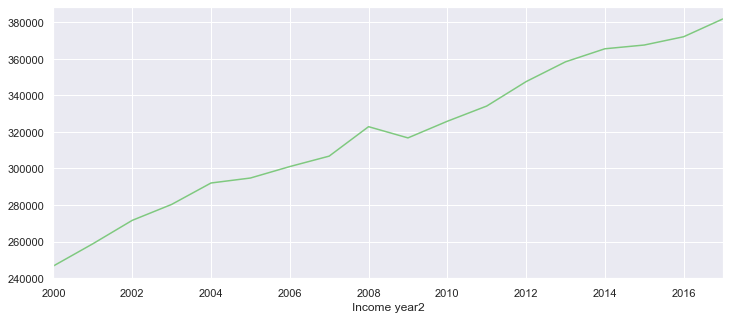

In [59]:
dfd_ar1_a['Number of individuals'].plot(figsize=(12,5))

In [60]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

### Run the augmented Dickey-Fuller Test to confirm stationarity

In [62]:
adf_test(dfd_ar1_a['Number of individuals'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -1.131140
p-value                  0.702495
# lags used              0.000000
# observations          17.000000
critical value (1%)     -3.889266
critical value (5%)     -3.054358
critical value (10%)    -2.666984
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


### Determine the (p,q) ARMA Orders using <tt>pmdarima.auto_arima</tt>

In [63]:
len(dfd_ar1_a)

18

In [64]:
# Set 5 years for testing (25 %) 
train = dfd_ar1_a.iloc[:14]
test = dfd_ar1_a.iloc[14:]

In [65]:
train.head()

,Number of property interests1,Age range4,Number of individuals
Income year2,,,
2000-01-01,1,c. 40 - 49,246659
2001-01-01,1,c. 40 - 49,258795
2002-01-01,1,c. 40 - 49,271614
2003-01-01,1,c. 40 - 49,280326
2004-01-01,1,c. 40 - 49,292062


In [68]:
columns = ['Number of property interests1', 'Age range4']

In [69]:
test = test.drop(columns, axis=1)
train = train.drop(columns, axis=1)

In [70]:
train.head() #2 unused columns dropped  

,Number of individuals
Income year2,
2000-01-01,246659
2001-01-01,258795
2002-01-01,271614
2003-01-01,280326
2004-01-01,292062


In [71]:
model = ARMA(train['Number of individuals'],order=(0,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARMA Model Results                               
=================================================================================
Dep. Variable:     Number of individuals   No. Observations:                   14
Model:                        ARMA(0, 1)   Log Likelihood                -158.713
Method:                          css-mle   S.D. of innovations          18415.929
Date:                   Fri, 01 Nov 2019   AIC                            323.426
Time:                           19:00:41   BIC                            325.343
Sample:                       01-01-2000   HQIC                           323.248
                            - 01-01-2013                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        3.039e+05   9531.154     31.880      0.000    2.85e+05    3.23e+05
ma.L1.Number of individuals     1.0000      0.289      3.458      0.005       0.433       1.567
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

### Obtain 3 years worth of predicted values

In [72]:
start=len(train)
end=len(train)+len(test)-1

In [73]:
predictions = results.predict(start=start, end=end).rename('ARMA(0,1) Predictions')

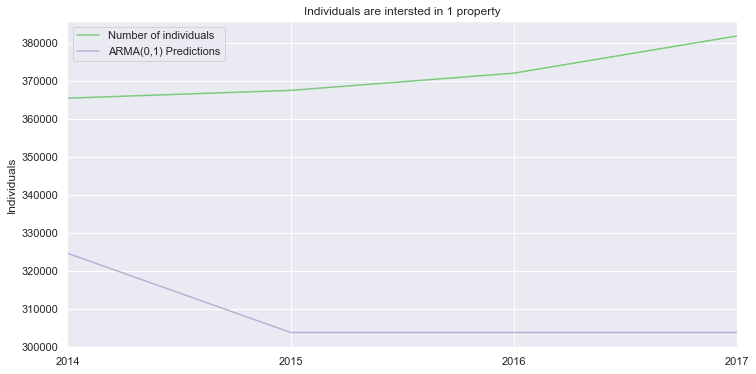

In [77]:
title = 'Individuals are intersted in 1 property'
ylabel='Individuals'
xlabel='' # we don't really need a label here

ax = test['Number of individuals'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True,)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Autoregressive Integrated Moving Average - ARIMA(p,d,q)
The steps are the same as for ARMA(p,q), except that we'll apply a differencing component to make the dataset stationary.<br>
First let's take a look at the <em>dfd_ar1_a</em> dataset.
### Plot the Source Data

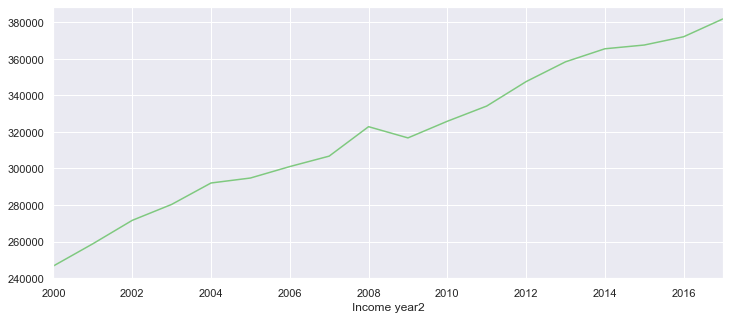

In [78]:
 dfd_ar1_a['Number of individuals'].plot(figsize=(12,5))

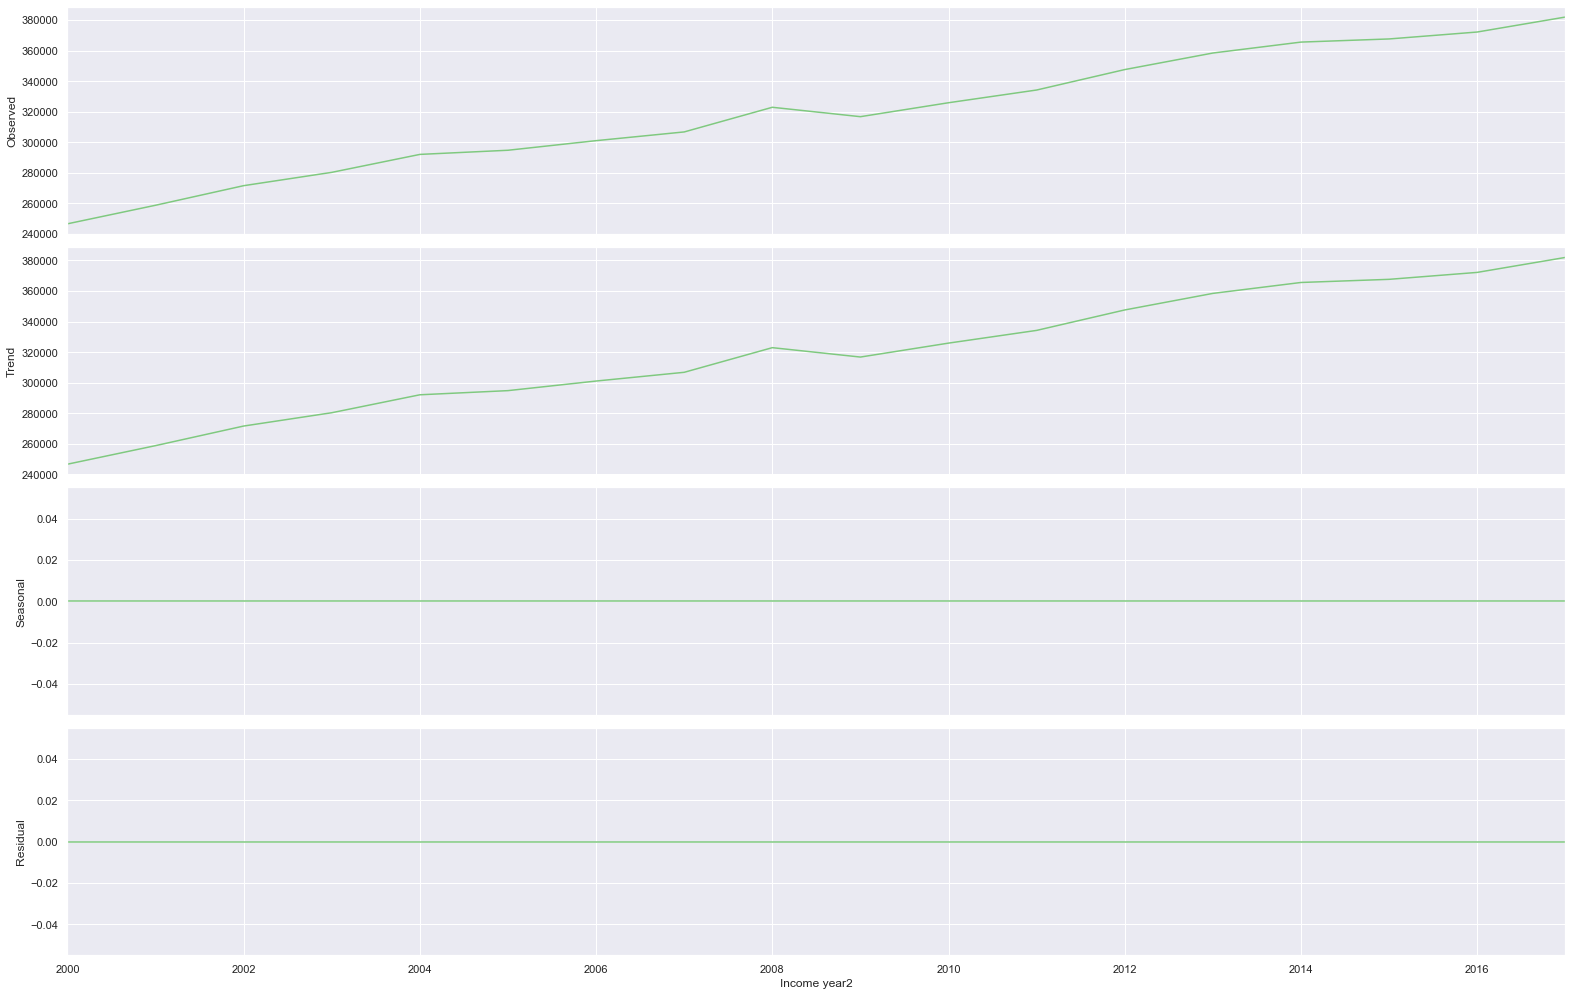

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dfd_ar1_a['Number of individuals'], model='additive')  # model='add' also works
result.plot();

No seasonality foundon the data and data is not residual

In [80]:
auto_arima(dfd_ar1_a['Number of individuals'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   17
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -169.330
Method:                           css   S.D. of innovations           5123.701
Date:                Fri, 01 Nov 2019   AIC                            342.659
Time:                        19:05:06   BIC                            344.326
Sample:                             1   HQIC                           342.825
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7955.9412   1242.680      6.402      0.000    5520.333    1.04e+04
==============================================================================
"""

In [81]:
from statsmodels.tsa.statespace.tools import diff
dfd_ar1_a['d1'] = diff(dfd_ar1_a['Number of individuals'],k_diff=1)

In [82]:
adf_test(dfd_ar1_a['d1'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -4.751856
p-value                  0.000067
# lags used              0.000000
# observations          16.000000
critical value (1%)     -3.924019
critical value (5%)     -3.068498
critical value (10%)    -2.673893
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


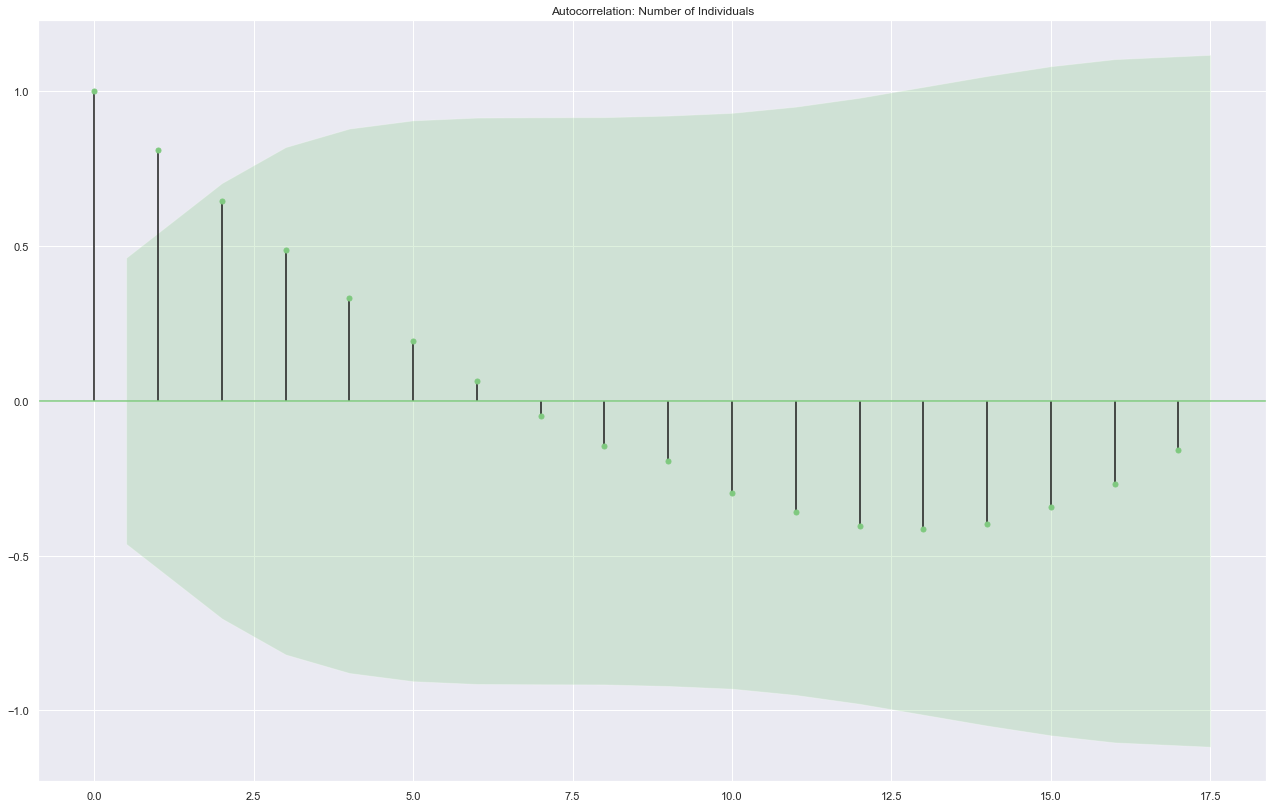

In [83]:
title = 'Autocorrelation: Number of Individuals'
lags = 17
plot_acf(dfd_ar1_a['Number of individuals'],title=title,lags=lags);

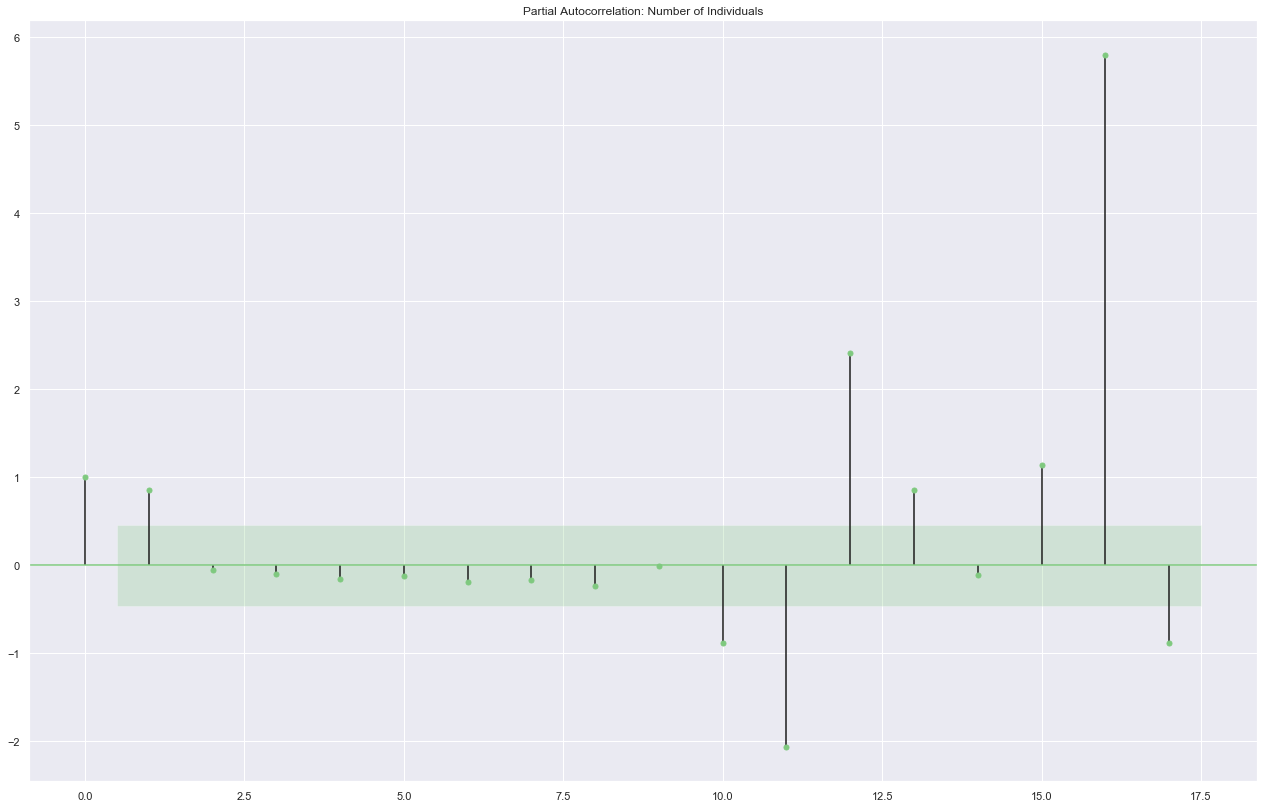

In [84]:
title = 'Partial Autocorrelation: Number of Individuals'
lags = 17
plot_pacf(dfd_ar1_a['Number of individuals'],title=title,lags=lags);

In [85]:
stepwise_fit = auto_arima(dfd_ar1_a['Number of individuals'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=342.659, BIC=344.326, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=343.863, BIC=346.363, Fit time=0.041 seconds
Fit ARIMA: order=(0, 1, 1); AIC=343.715, BIC=346.214, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.139 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   17
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -169.330
Method:                           css   S.D. of innovations           5123.701
Date:                Fri, 01 Nov 2019   AIC                            342.659
Time:                        19:06:05   BIC                            344.326
Sample:                             1   HQIC                           342.825
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7955.9412   1242.680      6.402      0.000    5520.333    1.04e+04
==============================================================================
"""

Looks good from here! Now let's train & test the ARIMA(0,1,0) model, evaluate it, then produce a forecast of future values.
### Split the data into train/test sets

In [86]:
dfd_ar1_a.head(2)

,Number of property interests1,Age range4,Number of individuals,d1
Income year2,,,,
2000-01-01,1,c. 40 - 49,246659,NaN
2001-01-01,1,c. 40 - 49,258795,12136.0


In [87]:
# Set 5 year for testing
train = dfd_ar1_a.iloc[:13]
test = dfd_ar1_a.iloc[13:]

In [88]:
columns = ['Number of property interests1', 'Age range4','d1']
test = test.drop(columns, axis=1)
train = train.drop(columns, axis=1)

In [89]:
train = train.astype('float32')
test = test.astype('float32')

### Fit an ARIMA(0,1,0) Model

In [90]:
model = ARIMA(train['Number of individuals'],order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                
===================================================================================
Dep. Variable:     D.Number of individuals   No. Observations:                   12
Model:                      ARIMA(0, 1, 0)   Log Likelihood                -120.731
Method:                                css   S.D. of innovations           5664.568
Date:                     Fri, 01 Nov 2019   AIC                            245.462
Time:                             19:06:54   BIC                            246.432
Sample:                         01-01-2001   HQIC                           245.103
                              - 01-01-2012                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8408.0000   1635.220      5.142      0.000    5203.028    1.16e+04
==============================================================================
"""

In [91]:
start = len(train)
end = len(train) + len(test) -1

In [92]:
predictions = results.predict(start= start, end = end, typ = 'levels').rename('ARIMA(0,1,0) Predictions')

In [93]:
predictions

2013-01-01    355963.0
2014-01-01    364371.0
2015-01-01    372779.0
2016-01-01    381187.0
2017-01-01    389595.0
Freq: AS-JAN, Name: ARIMA(0,1,0) Predictions, dtype: float64

[Text(0, 0.5, 'individuals number'), Text(0.5, 0, '')]

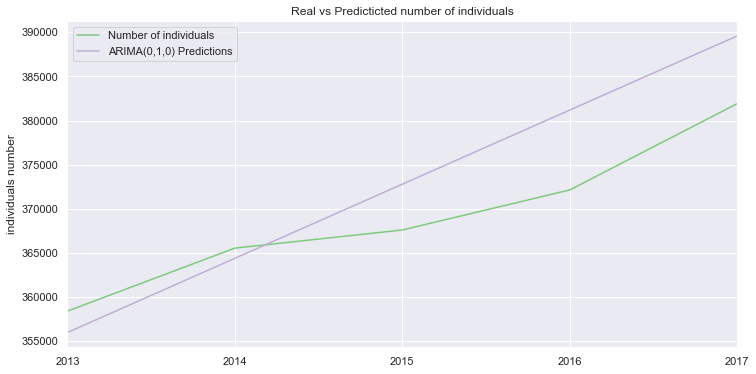

In [94]:
# Plot predictions against known values
title = 'Real vs Predicticted number of individuals'
ylabel='individuals number'
xlabel='' # we don't really need a label here

ax = test['Number of individuals'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### Evaluate the Model

In [95]:
test['Number of individuals'].mean()


369107.6

In [96]:
predictions.mean()

372779.0

Test mean and prediction mean is close! Our model did a great job

In [97]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Number of individuals'], predictions)
print(f'ARIMA(0,1,0) MSE Error: {error:11.10}')

ARIMA(0,1,0) MSE Error:  35078712.2


In [98]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Number of individuals'], predictions)
print(f'ARIMA(0,1,0) RMSE Error: {error:11.10}')

ARIMA(0,1,0) RMSE Error: 5922.728442


### Retraining the model on the full data, and forecast the future

In [99]:
columns = ['Number of property interests1', 'Age range4','d1']
dfd_ar1_a = dfd_ar1_a.drop(columns, axis=1)

In [105]:
model3 = ARIMA(dfd_ar1_a['Number of individuals'],order=(0,1,0))

In [106]:
dfd_ar1_a.head(2)

,Number of individuals
Income year2,
2000-01-01,246659.0
2001-01-01,258795.0


In [107]:
dfd_ar1_a = dfd_ar1_a.astype('float64')

In [108]:
results3 = model3.fit()

In [109]:
fcast = results3.predict(len(dfd_ar1_a),len(dfd_ar1_a)+4,typ='levels').rename('ARIMA(0,1,0) Forecast')

[Text(0, 0.5, 'Individual numbers'), Text(0.5, 0, '')]

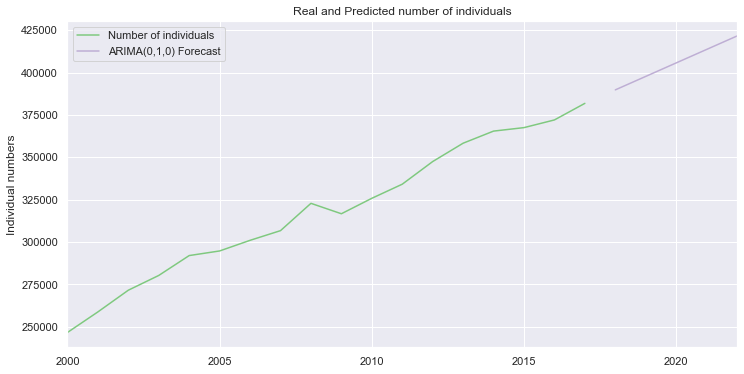

In [110]:
# Plot predictions against known values
title = 'Real and Predicted number of individuals'
ylabel='Individual numbers'
#xlabel='' # we don't really need a label here

ax = dfd_ar1_a['Number of individuals'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [111]:
dfd_ar1_a.head()

,Number of individuals
Income year2,
2000-01-01,246659.0
2001-01-01,258795.0
2002-01-01,271614.0
2003-01-01,280326.0
2004-01-01,292062.0


## Linear Regression
appliying linerar regression on the data(dfd_ar1) to predict number of individuals in future years

In [112]:
X = dfd_ar1[['Income year2', 'Number of property interests1']]
y = dfd_ar1[['Number of individuals']]

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#creating and training the model

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

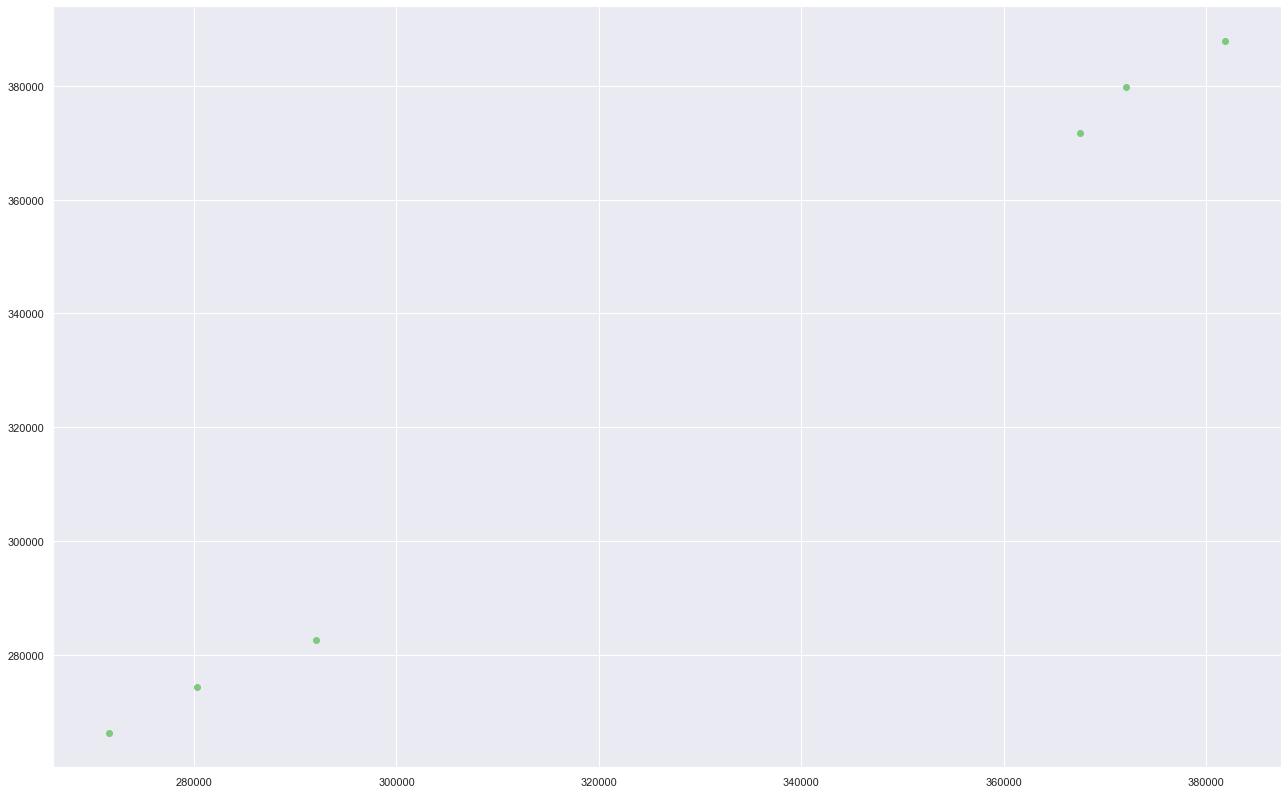

In [114]:
predictions = lm.predict(X_test);
plt.scatter(y_test,predictions);

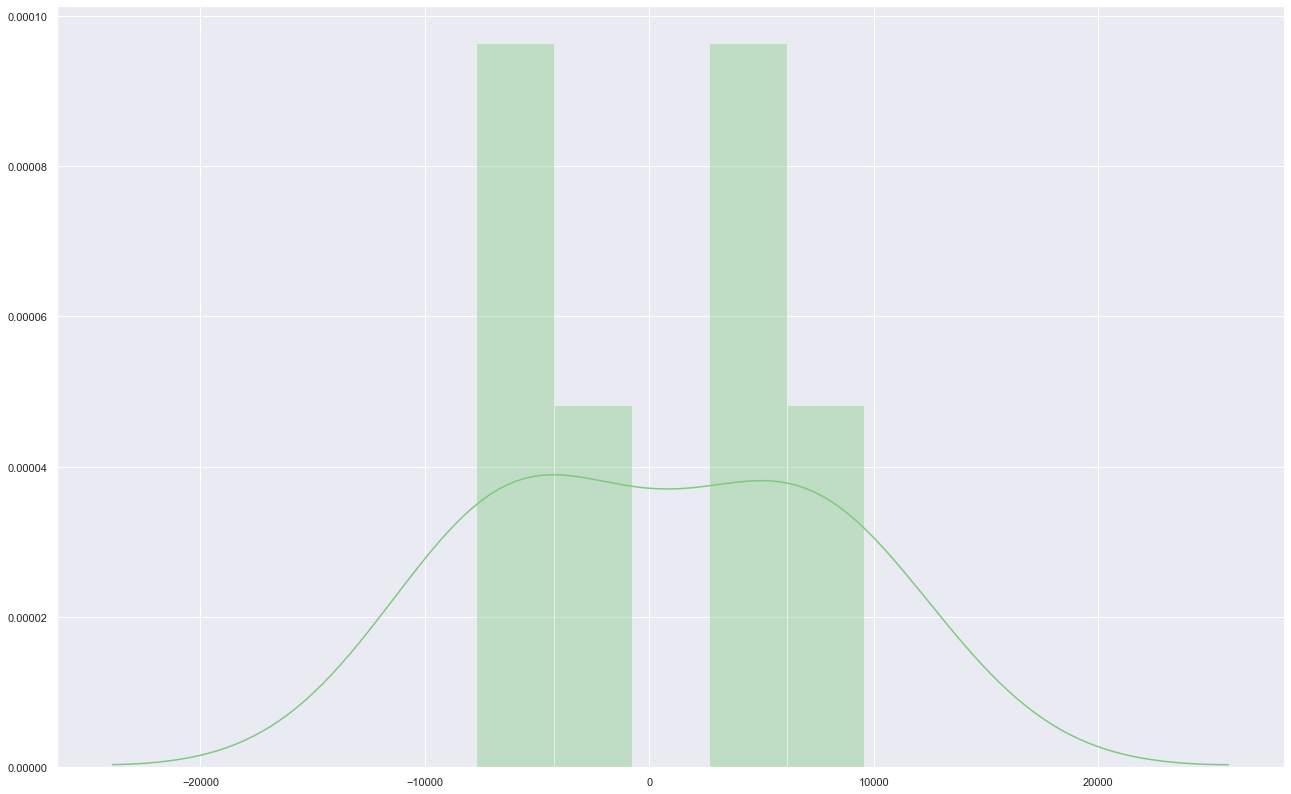

In [115]:
sns.distplot((y_test-predictions),bins=5);

### Model evaluation

In [116]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6455.113149847214
MSE: 44728713.76662619
RMSE: 6687.952883104529


## KNN to Predict Number of Property Interest

In [117]:
dfd.head()

,Income year2,Number of property interests1,Age range4,Number of individuals
0,2000,1,a. Less than 30,96269
1,2000,1,b. 30 - 39,224650
2,2000,1,c. 40 - 49,246659
3,2000,1,d. 50 - 59,198556
4,2000,1,e. 60 or more,122964


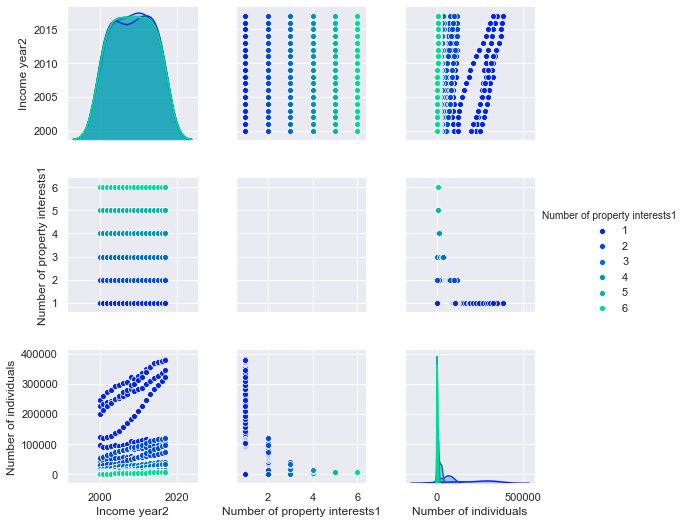

In [118]:
sns.pairplot(dfd,hue='Number of property interests1',palette='winter')

##### Getting dummy data for Taxable income range  to train the model

In [119]:
dfd_dummy = pd.get_dummies(dfd)

In [120]:
dfd_dummy.head()

,Income year2,Number of property interests1,Number of individuals,Age range4_a. Less than 30,Age range4_b. 30 - 39,Age range4_c. 40 - 49,Age range4_d. 50 - 59,Age range4_e. 60 or more,Age range4_f. Unknown
0,2000,1,96269,1,0,0,0,0,0
1,2000,1,224650,0,1,0,0,0,0
2,2000,1,246659,0,0,1,0,0,0
3,2000,1,198556,0,0,0,1,0,0
4,2000,1,122964,0,0,0,0,1,0


#### Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(dfd_dummy.drop('Number of property interests1',axis=1))
scaled_features = scaler.transform(dfd_dummy.drop('Number of property interests1',axis=1))

In [122]:
scaled_features

array([[-1.64076453,  0.46559169,  2.04577252, ..., -0.4888129 ,
        -0.4888129 , -0.19245009],
       [-1.64076453,  1.84762121, -0.4888129 , ..., -0.4888129 ,
        -0.4888129 , -0.19245009],
       [-1.64076453,  2.08454947, -0.4888129 , ..., -0.4888129 ,
        -0.4888129 , -0.19245009],
       ...,
       [ 1.63114127, -0.5248479 , -0.4888129 , ..., -0.4888129 ,
        -0.4888129 , -0.19245009],
       [ 1.63114127, -0.49588988, -0.4888129 , ...,  2.04577252,
        -0.4888129 , -0.19245009],
       [ 1.63114127, -0.49156233, -0.4888129 , ..., -0.4888129 ,
         2.04577252, -0.19245009]])

In [123]:
dfd_dummy.columns

Index(['Income year2', 'Number of property interests1',
       'Number of individuals', 'Age range4_a. Less than 30',
       'Age range4_b. 30 - 39', 'Age range4_c. 40 - 49',
       'Age range4_d. 50 - 59', 'Age range4_e. 60 or more',
       'Age range4_f. Unknown'],
      dtype='object')

In [124]:
#Rearranging columns to fit into the model
dfd_dummy = dfd_dummy[['Income year2','Number of individuals', 'Age range4_a. Less than 30',
       'Age range4_b. 30 - 39', 'Age range4_c. 40 - 49',
       'Age range4_d. 50 - 59', 'Age range4_e. 60 or more',
       'Age range4_f. Unknown','Number of property interests1']]

In [125]:
dfd_dummy.head()

,Income year2,Number of individuals,Age range4_a. Less than 30,Age range4_b. 30 - 39,Age range4_c. 40 - 49,Age range4_d. 50 - 59,Age range4_e. 60 or more,Age range4_f. Unknown,Number of property interests1
0,2000,96269,1,0,0,0,0,0,1
1,2000,224650,0,1,0,0,0,0,1
2,2000,246659,0,0,1,0,0,0,1
3,2000,198556,0,0,0,1,0,0,1
4,2000,122964,0,0,0,0,1,0,1


In [126]:
df_feat = pd.DataFrame(scaled_features,columns=dfd_dummy.columns[:-1])
df_feat.head()

,Income year2,Number of individuals,Age range4_a. Less than 30,Age range4_b. 30 - 39,Age range4_c. 40 - 49,Age range4_d. 50 - 59,Age range4_e. 60 or more,Age range4_f. Unknown
0,-1.640765,0.465592,2.045773,-0.488813,-0.488813,-0.488813,-0.488813,-0.19245
1,-1.640765,1.847621,-0.488813,2.045773,-0.488813,-0.488813,-0.488813,-0.19245
2,-1.640765,2.084549,-0.488813,-0.488813,2.045773,-0.488813,-0.488813,-0.19245
3,-1.640765,1.566718,-0.488813,-0.488813,-0.488813,2.045773,-0.488813,-0.19245
4,-1.640765,0.752965,-0.488813,-0.488813,-0.488813,-0.488813,2.045773,-0.19245


### Train Test Split

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,dfd_dummy['Number of property interests1'],
                                                    test_size=0.30)

In [130]:
## KNN applying initial k value = 1 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [131]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [132]:
pred = knn.predict(X_test)

### Prediction and evaluation

In [133]:
from sklearn.metrics import classification_report,confusion_matrix

In [134]:
print(confusion_matrix(y_test,pred))

[[33  3  0  0  0  0]
 [ 3 20  3  1  0  0]
 [ 0  0  8 22  3  0]
 [ 0  0  1  0 15  8]
 [ 0  0  1  5  0 16]
 [ 0  0  1  5 20  0]]


### Choosing a K Value

Using the elbow method to pick a good K Value:

In [135]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

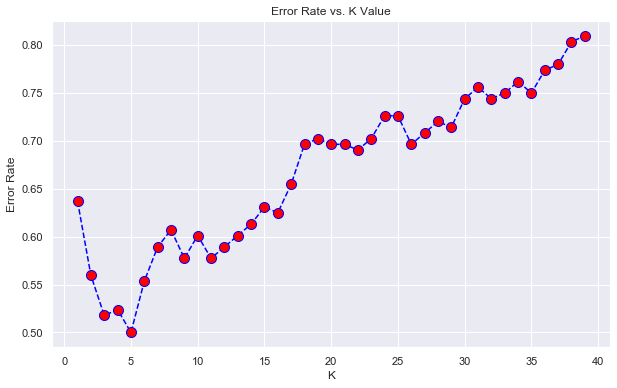

In [136]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after around K = 5 the error rate going upwards! K = 5 is perfect

In [137]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[33  3  0  0  0  0]
 [ 3 20  3  1  0  0]
 [ 0  0  8 22  3  0]
 [ 0  0  1  0 15  8]
 [ 0  0  1  5  0 16]
 [ 0  0  1  5 20  0]]


              precision    recall  f1-score   support

           1       0.92      0.92      0.92        36
           2       0.87      0.74      0.80        27
           3       0.57      0.24      0.34        33
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        26

    accuracy                           0.36       168
   macro avg       0.39      0.32      0.34       168
weighted avg       0.45      0.36      0.39       168



In [138]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[33  3  0  0  0  0]
 [ 3 22  2  0  0  0]
 [ 0  1 13 19  0  0]
 [ 0  3  1  7 10  3]
 [ 0  0  3  7  5  7]
 [ 0  0  3  6 13  4]]


              precision    recall  f1-score   support

           1       0.92      0.92      0.92        36
           2       0.76      0.81      0.79        27
           3       0.59      0.39      0.47        33
           4       0.18      0.29      0.22        24
           5       0.18      0.23      0.20        22
           6       0.29      0.15      0.20        26

    accuracy                           0.50       168
   macro avg       0.48      0.47      0.47       168
weighted avg       0.53      0.50      0.50       168



After changing k = 5 accuracy increased!

# Summary 

Age range (27D):  After analyzing table 27D we saw the number of individuals with single property interest and age range between 40-49 years was increasing significantly over the time period of 1999-2017 fiscal years. The number was increasing linearly with slope of 1. The number of individual with single property interest and age range 30-39 was also increasing. The data was non stationary non seasonal. Later we used Linear Regression, ARMA, ARIMA and KNN to predict number of individuals for 3 years in future.